二項分布に関する裾確率

In [59]:
from scipy.stats import binom

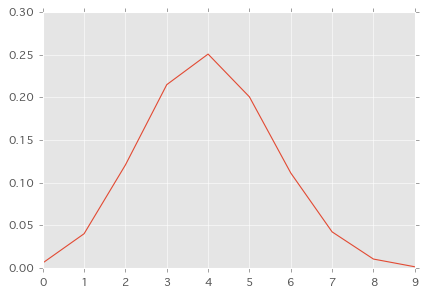

In [82]:
x = np.arange(0, 10)
y = binom.pmf(x, 10, 0.4)
plt.plot(x, y)

$ p(a, n^+, n) := 1 - F_B(n+ - 1; n, a) $

In [ ]:
a = 0.4

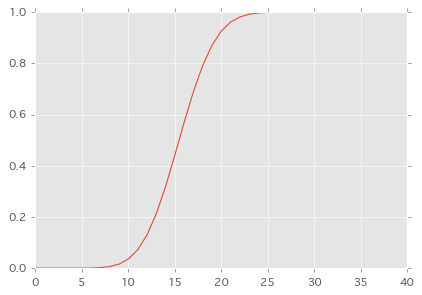

In [114]:
x = np.arange(0, 40)
y = binom.cdf(x, 40, 0.4)
plt.plot(x, y)

In [99]:
def calc_p_by_cdf(n_plus, n, a):
    return 1 - binom.cdf(n_plus - 1, n, a)

In [112]:
list_n_plus = np.arange(0, 50)
y = []
for n_plus in list_n_plus:
    y.append(calc_p_by_cdf(n_plus, 50, 0.4))

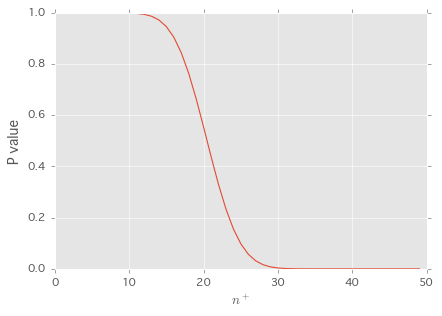

In [113]:
plt.plot(list_n_plus, y)
plt.ylabel('P value')
plt.xlabel('$n^+$')
# 

In [119]:
np.arange(1, 7).mean()/2

1.75

In [1]:
import scipy.stats
import scipy.

真の期待値が $\mu$ の時に期待値が $x$ であるかのように振る舞う確率 

1. 正規分布近似

In [41]:
N = 40
success = 20
p = success/N

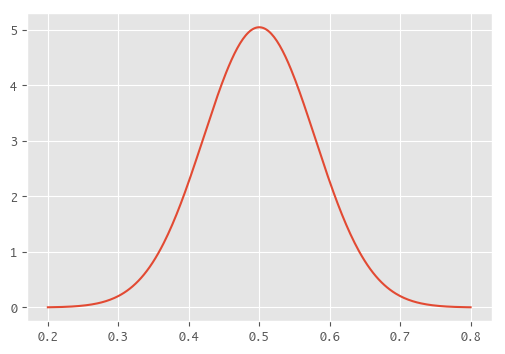

In [43]:
x = np.linspace(0.2, 0.8, 300)
y = scipy.stats.norm.pdf(x, p, np.sqrt(p*(1-p)/N))
plt.plot(x, y)

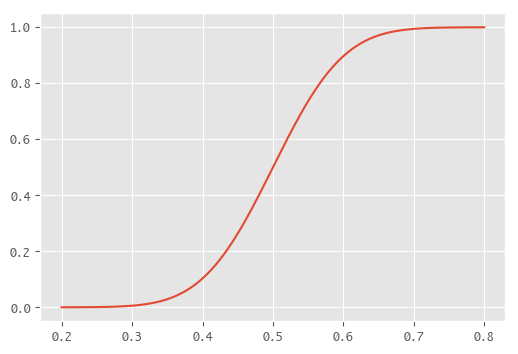

In [44]:
x = np.linspace(0.2, 0.8, 300)
y = scipy.stats.norm.cdf(x, p, np.sqrt(p*(1-p)/N))
plt.plot(x, y)

In [45]:
p+1.96*np.sqrt(p*(1-p)/N)

0.65495160534825059

In [46]:
p-1.96*np.sqrt(p*(1-p)/N)

0.34504839465174941

In [36]:
import statsmodels.stats.proportion

In [37]:
statsmodels.stats.proportion.proportion_confint(success, N, 0.05, 'normal')

(0.0016121619090446685, 0.023387838090955335)

$\mathbb{P}[\hat{\mu}_n \le x] \approx \Phi(\frac{\sqrt{n}(x - \mu)}{\sqrt{\mu(1-\mu)}})$

真の確率が0.5の時に $\mu \le 0.3$ かのように振る舞う確率

$\mathbb{P}[\hat{\mu}_n \le 0.3]$

In [82]:
n = 100
mu = 0.5
scipy.stats.norm.cdf(np.sqrt(n)*(0.3 - mu)/np.sqrt(mu*(1-mu)), 0, 1)

3.1671241833119863e-05

In [104]:
def calc_tail_prob_by_central_limit_theorem(x, mu, n):
    return scipy.stats.norm.cdf((np.sqrt(n)*(x - mu))/np.sqrt(mu*(1-mu)), 0, 1)

v_calc_tail_prob_by_central_limit_theorem = np.vectorize(calc_tail_prob_by_central_limit_theorem)

In [84]:
calc_tail_prob_by_central_limit_theorem(0.5, 0.5, 100)

0.5

In [59]:
def calc(mu_hat, mu, n):
    return np.sqrt(n)*(mu_hat - mu)/np.sqrt(mu*(1-mu))

x = np.linspace(0.2, 0.6)
calc = np.vectorize(calc)

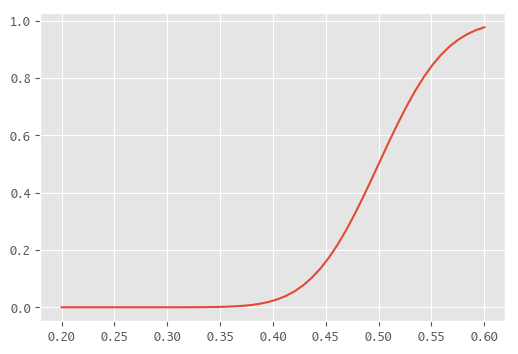

In [60]:
plt.plot(x, scipy.stats.norm.cdf(calc(x, mu, n)))

## ヘフディングの不等式

i.i.d. 確率変数 $X_i \in [0,1]$ と任意の $\Delta > 0$ に対して

$\mathbb{P}[\hat{\mu_n} \leq \mu - \Delta] \leq e^{-2n\Delta^2}$  
$\mathbb{P}[\hat{\mu_n} \geq \mu + \Delta] \leq e^{-2n\Delta^2}$

が成りたつ

## チェルノフ・ヘフディングの不等式

i.i.d. 確率変数 $X_i \in [0, 1]$ および任意の $0 \leq x \leq \mu$ に対して

$ \mathbb{P}[\hat{\mu} \leq x] \leq e^{-nd(x,-mu)}$

が成り立ち、また任意の $\mu \geq x \geq 1$ に対して

$ \mathbb{P}[\hat{\mu} \geq x] \leq e^{-nd(x,-mu)}$

が成り立つ

よって期待値が0.5の時に標本平均 $\hat{\mu} \le 0.3$ がとなる確率

In [116]:
def calc_tail_prob_by_heffding(x, mu, n):
    delta = np.abs(x - mu)
    return np.exp(-2*n*delta*delta)

v_calc_tail_prob_by_heffding = np.vectorize(
    calc_tail_prob_by_heffding)

In [117]:
def calc_tail_prob_by_chernoff_hoeffding(x, mu, n):
    return np.exp(-1*n*calc_kld(x, mu))

v_calc_tail_prob_by_chernoff_hoeffding = np.vectorize(
    calc_tail_prob_by_chernoff_hoeffding)

def calc_kld(p, q):
    """ベルヌーイ分布間のKL-Divergenceを返す"""
    return p*np.log(p/q) + (1-p)*np.log((1-p)/(1-q))

In [118]:
calc_tail_prob_by_central_limit_theorem(0.02, 0.05, 100)

0.084334309443907463

In [119]:
calc_heffding(0.02, 0.05, 100)

0.835270211411272

In [120]:
calc_chernoff_hoeffding(0.02, 0.05, 100)

0.29691895116700268

### 実験 期待値が0.05の時に標本の期待値が0.02以下になる確率

サンプルサイズを変えながら見てみる

In [112]:
x = np.arange(1, 400, 5)
y = v_calc_tail_prob_by_central_limit_theorem(0.02, 0.05, x)

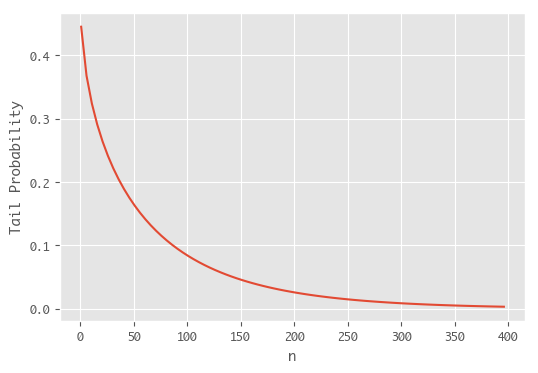

In [115]:
plt.plot(x, y)
plt.xlabel('n')
plt.ylabel('Tail Probability')

In [121]:
x = np.arange(1, 400, 5)
y = v_calc_tail_prob_by_heffding(0.02, 0.05, x)

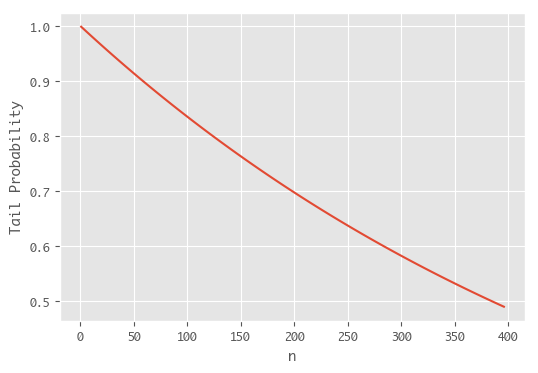

In [122]:
plt.plot(x, y)
plt.xlabel('n')
plt.ylabel('Tail Probability')

In [242]:
x = np.arange(1, 400, 5)
y = v_calc_tail_prob_by_chernoff_hoeffding(0.02, 0.05, x)

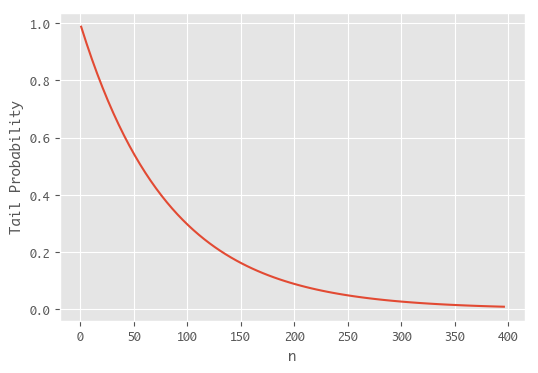

In [124]:
plt.plot(x, y)
plt.xlabel('n')
plt.ylabel('Tail Probability')

### n=100の時の実験

$\mu = 0.05$ のベルヌーイ分布から発生させた乱数の標本平均 $\hat{\mu}$ が0.02以下になる確率 

In [302]:
def test(x, mu, n):
    ret = 0
    tests = 25000
    for _ in range(tests):
        if scipy.stats.bernoulli.rvs(mu, size=n).mean() <= x:
            ret += 1
    return ret/tests

v_test = np.vectorize(test)

In [303]:
x  = 0.01
mu = 0.03

In [304]:
n = np.arange(1, 1000, 20)
y = v_test(x, mu, n)

In [305]:
y_heffding = v_calc_tail_prob_by_heffding(x, mu, n)
y_chernoff_heffding = v_calc_tail_prob_by_chernoff_hoeffding(x, mu, n)
y_central_limit_theorem = v_calc_tail_prob_by_central_limit_theorem(x, mu, n)

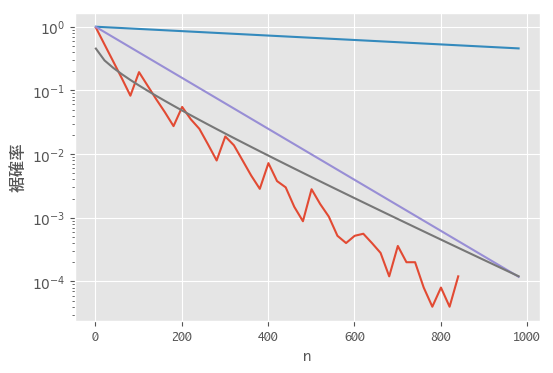

In [306]:
plt.semilogy(n, y)
plt.semilogy(n, y_heffding)
plt.semilogy(n, y_chernoff_heffding)
plt.semilogy(n, y_central_limit_theorem)
plt.xlabel('n')
plt.ylabel('裾確率')

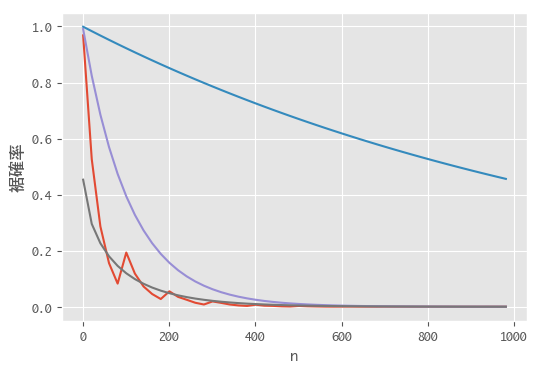

In [307]:
plt.plot(n, y)
plt.plot(n, y_heffding)
plt.plot(n, y_chernoff_heffding)
plt.plot(n, y_central_limit_theorem)
plt.xlabel('n')
plt.ylabel('裾確率')

In [309]:
scipy.stats.norm.pdf?

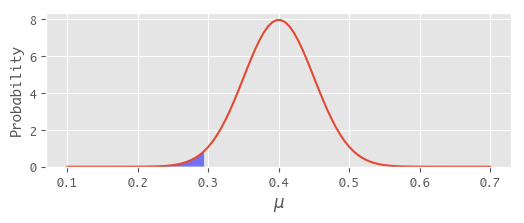

In [343]:
plt.figure(figsize=(6, 2))
x = np.linspace(0.1, 0.7, 100)
y = scipy.stats.norm.pdf(x, 0.4, 0.05)
plt.plot(x, y)
plt.ylim(0)
plt.ylabel('Probability')
plt.xlabel('$\mu$')
plt.fill_between(x, y, np.zeros(100),where=x<0.3,facecolor='b',alpha=0.5)
